   ID_estudiante  Edad     Genero  %_Registro_Social_de_Hogares  \
0              1    20  Masculino                            40   
1              2    21  Masculino                            40   
2              3    20  Masculino                            40   
3              4    21  Masculino                            60   
4              5    20  Masculino                            40   

  Estudia_con_Gratuidad  Promedio_de_%_Asistencia_del_Semestre_Anterior  \
0                    Si                                              60   
1                    Si                                              64   
2                    Si                                              78   
3                    Si                                              64   
4                    Si                                              78   

   Promedio_Notas_Semestre_Anterior  Satisfaccion_con_la_Carrera  \
0                               4.2                            4   
1         

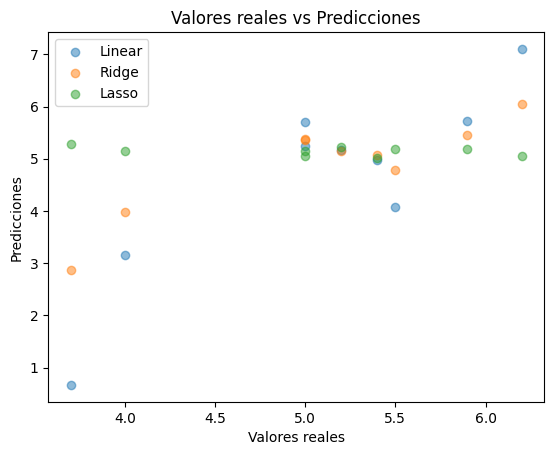

Linear Regression Coefficients:
Coeficientes del modelo (derivadas parciales):
                                                Partial Derivative
ID_estudiante                                            -0.009889
Edad                                                     -0.089283
Genero                                                    0.427796
%_Registro_Social_de_Hogares                              0.012236
Estudia_con_Gratuidad                                     0.064635
Promedio_de_%_Asistencia_del_Semestre_Anterior           -0.005075
Satisfaccion_con_la_Carrera                               0.327657
Nivel_de_Motivacion                                      -0.261059
Problemas_Personales                                     -0.042363
Problemas_Familiares                                      0.157641
Horas_de_Sueno_Diarias                                   -0.247669
Participa_en_Clases                                       0.525109
Ultima_Nota_Obtenida                              

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Carga el conjunto de datos
df = pd.read_csv("/Users/sofia/Desktop/PredictGrades/Datos_De_Estudiantes.csv")

# Exploración de los datos
print(df.head())
print(df.describe())
print(df.info())

# Asegurarse de que no haya valores faltantes
print(df.isnull().sum())

# Transformación de datos categóricos en variables numéricas
df['Genero'] = df['Genero'].map({'Masculino': 0, 'Femenino': 1})
df['Estudia_con_Gratuidad'] = df['Estudia_con_Gratuidad'].map({'No': 0, 'Si': 1})
df['Problemas_Personales'] = df['Problemas_Personales'].map({'No': 0, 'Si': 1})
df['Problemas_Familiares'] = df['Problemas_Familiares'].map({'No': 0, 'Si': 1})
df['Participa_en_Clases'] = df['Participa_en_Clases'].map({'No': 0, 'Si': 1})
df['Trabaja'] = df['Trabaja'].map({'No': 0, 'Si': 1})

# Verifica las transformaciones
print(df.head())

# Separación de variables independientes (X) y dependiente (y)
X = df.drop("Promedio_Notas_Semestre_Anterior", axis=1)
y = df["Promedio_Notas_Semestre_Anterior"]

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Creación del modelo de regresión lineal
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

# Validación cruzada para evaluar el modelo
def evaluate_model(model, X_train, y_train):
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)
    print(f"CV RMSE: {cv_rmse.mean()} ± {cv_rmse.std()}")
    model.fit(X_train, y_train)
    return model

linear_model = evaluate_model(linear_model, X_train, y_train)
ridge_model = evaluate_model(ridge_model, X_train, y_train)
lasso_model = evaluate_model(lasso_model, X_train, y_train)

# Evaluación del modelo
def model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"R^2: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    return y_pred

print("Linear Regression Performance:")
y_pred_linear = model_performance(linear_model, X_test, y_test)

print("Ridge Regression Performance:")
y_pred_ridge = model_performance(ridge_model, X_test, y_test)

print("Lasso Regression Performance:")
y_pred_lasso = model_performance(lasso_model, X_test, y_test)

# Visualización de resultados
plt.scatter(y_test, y_pred_linear, label='Linear', alpha=0.5)
plt.scatter(y_test, y_pred_ridge, label='Ridge', alpha=0.5)
plt.scatter(y_test, y_pred_lasso, label='Lasso', alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Valores reales vs Predicciones")
plt.legend()
plt.show()

# Coeficientes del modelo (derivadas parciales)
def print_coefficients(model, X):
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Partial Derivative'])
    print("Coeficientes del modelo (derivadas parciales):")
    print(coefficients)

print("Linear Regression Coefficients:")
print_coefficients(linear_model, X)

print("Ridge Regression Coefficients:")
print_coefficients(ridge_model, X)

print("Lasso Regression Coefficients:")
print_coefficients(lasso_model, X)

# Análisis de derivadas para interpretar el impacto de cada variable independiente
def partial_derivatives(model, X):
    derivatives = model.coef_
    return pd.DataFrame(derivatives, index=X.columns, columns=['Partial Derivative'])

partials_linear = partial_derivatives(linear_model, X)
partials_ridge = partial_derivatives(ridge_model, X)
partials_lasso = partial_derivatives(lasso_model, X)

print("Linear Regression Derivadas parciales calculadas:")
print(partials_linear)

print("Ridge Regression Derivadas parciales calculadas:")
print(partials_ridge)

print("Lasso Regression Derivadas parciales calculadas:")
print(partials_lasso)

# Función para predecir el rendimiento académico
def predict_performance(student_data, model):
    student_df = pd.DataFrame(student_data, index=[0])
    student_df['Genero'] = student_df['Genero'].map({'Masculino': 0, 'Femenino': 1})
    student_df['Estudia_con_Gratuidad'] = student_df['Estudia_con_Gratuidad'].map({'No': 0, 'Si': 1})
    student_df['Problemas_Personales'] = student_df['Problemas_Personales'].map({'No': 0, 'Si': 1})
    student_df['Problemas_Familiares'] = student_df['Problemas_Familiares'].map({'No': 0, 'Si': 1})
    student_df['Participa_en_Clases'] = student_df['Participa_en_Clases'].map({'No': 0, 'Si': 1})
    student_df['Trabaja'] = student_df['Trabaja'].map({'No': 0, 'Si': 1})
    prediction = model.predict(student_df)
    return prediction

# Ejemplo de predicción
nuevo_estudiante = {
    "ID_estudiante": 31,
    "Edad": 21,
    "Genero": "Femenino",
    "%_Registro_Social_de_Hogares": 50,
    "Estudia_con_Gratuidad": "Si",
    "Promedio_de_%_Asistencia_del_Semestre_Anterior": 80,
    "Satisfaccion_con_la_Carrera": 4,
    "Nivel_de_Motivacion": 4,
    "Problemas_Personales": "No",
    "Problemas_Familiares": "No",
    "Horas_de_Sueno_Diarias": 7,
    "Participa_en_Clases": "Si",
    "Ultima_Nota_Obtenida": 5.0,
    "Ramos_Desaprobados": 0,
    "Trabaja": "No"
}

print(f"Predicción del ultimo promedio semestre anterior (Linear): {predict_performance(nuevo_estudiante, linear_model)[0]}")
print(f"Predicción del ultimo promedio semestre anterior (Ridge): {predict_performance(nuevo_estudiante, ridge_model)[0]}")
print(f"Predicción del ultimo promedio semestre anterior (Lasso): {predict_performance(nuevo_estudiante, lasso_model)[0]}")
